In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

In [2]:
ratings = pd.read_csv('ratings.csv')
credits = pd.read_csv("credits.csv")
keywords = pd.read_csv("keywords.csv")
links = pd.read_csv("links.csv")
movies_metadata = pd.read_csv('movies_metadata.csv')

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [4]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [5]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [6]:
credits.isnull().sum()

cast    0
crew    0
id      0
dtype: int64

In [7]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [8]:
keywords.isnull().sum()

id          0
keywords    0
dtype: int64

In [9]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [10]:
links.isnull().sum()

movieId      0
imdbId       0
tmdbId     219
dtype: int64

In [11]:
movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [12]:
movies_metadata.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [13]:
movies_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [14]:
movies_metadata = movies_metadata.dropna(axis=0, subset=('revenue', )) # 수익이 na인 행 삭제
movies_metadata = movies_metadata.dropna(axis=0, subset=('popularity', )) # 인기도 na인 행 삭제

In [15]:
movies_metadata['budget'] = movies_metadata['budget'].astype('float64')
movies_metadata['popularity'] = movies_metadata['popularity'].astype('float64')

In [16]:
movies_metadata.corr()

,budget,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.449645,0.768776,0.134733,0.073494,0.676642
popularity,0.449645,1.000000,0.506179,0.129927,0.154399,0.559965
revenue,0.768776,0.506179,1.000000,0.103917,0.083868,0.812022
runtime,0.134733,0.129927,0.103917,1.000000,0.158146,0.113539
vote_average,0.073494,0.154399,0.083868,0.158146,1.000000,0.123607
vote_count,0.676642,0.559965,0.812022,0.113539,0.123607,1.000000


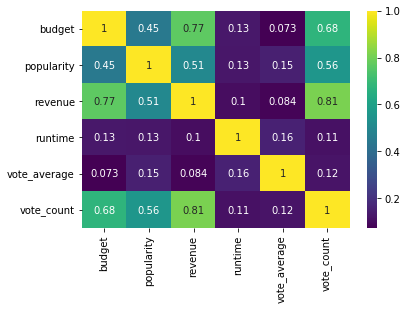

In [17]:
sns.heatmap(movies_metadata.corr(),annot=True, cmap='viridis');

In [18]:
movies_metadata['id'] = movies_metadata['id'].astype('float64')

In [19]:
df = movies_metadata.merge(credits, on=["id"],how="left")

In [20]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602.0,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357.0,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862.0,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [21]:
df = df.drop(['original_language','overview','poster_path','homepage','tagline','video' ],axis = 1)

In [22]:
df.isnull().sum()

adult                        0
belongs_to_collection    41037
budget                       0
genres                       0
id                           0
imdb_id                     17
original_title               0
popularity                   0
production_companies         0
production_countries         0
release_date                84
revenue                      0
runtime                    257
spoken_languages             0
status                      81
title                        0
vote_average                 0
vote_count                   0
cast                         1
crew                         1
dtype: int64

In [23]:
df.head()

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862.0,tt0114709,Toy Story,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844.0,tt0113497,Jumanji,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602.0,tt0113228,Grumpier Old Men,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357.0,tt0114885,Waiting to Exhale,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",11862.0,tt0113041,Father of the Bride Part II,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [24]:
df = df.dropna(axis=0, subset=('cast', ))
df = df.dropna(axis=0, subset=('crew', ))

In [25]:
df['cast'] = df['cast'].apply(literal_eval)
df['crew'] = df['crew'].apply(literal_eval)

In [26]:
df['cast_size'] = df['cast'].apply(lambda x: len(x))
df['crew_size'] = df['crew'].apply(lambda x: len(x))

In [27]:
df.head()

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_title,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew,cast_size,crew_size
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862.0,tt0114709,Toy Story,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",13,106
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844.0,tt0113497,Jumanji,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",26,16
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602.0,tt0113228,Grumpier Old Men,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",7,4
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357.0,tt0114885,Waiting to Exhale,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",10,10
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",11862.0,tt0113041,Father of the Bride Part II,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",12,7


In [28]:
df['cast'] = df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [29]:
df['genres'] = df['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [30]:
df['belongs_to_collection'] = df['belongs_to_collection'].fillna("[]").apply(literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)

In [31]:
df['spoken_languages'] = df['spoken_languages'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [32]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [33]:
df['director'] = df['crew'].apply(get_director)

In [34]:
df['production_companies'] = df['production_companies'].apply(literal_eval)
df['production_companies'] = df['production_companies'].fillna("[]").apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [35]:
df['production_countries'] = df['production_countries'].apply(literal_eval)
df['production_countries'] = df['production_countries'].fillna("[]").apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [36]:
df.head()

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_title,popularity,production_companies,production_countries,...,spoken_languages,status,title,vote_average,vote_count,cast,crew,cast_size,crew_size,director
0,False,Toy Story Collection,30000000.0,"[Animation, Comedy, Family]",862.0,tt0114709,Toy Story,21.946943,[Pixar Animation Studios],[United States of America],...,[English],Released,Toy Story,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",13,106,John Lasseter
1,False,NaN,65000000.0,"[Adventure, Fantasy, Family]",8844.0,tt0113497,Jumanji,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],...,"[English, Français]",Released,Jumanji,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",26,16,Joe Johnston
2,False,Grumpy Old Men Collection,0.0,"[Romance, Comedy]",15602.0,tt0113228,Grumpier Old Men,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],...,[English],Released,Grumpier Old Men,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",7,4,Howard Deutch
3,False,NaN,16000000.0,"[Comedy, Drama, Romance]",31357.0,tt0114885,Waiting to Exhale,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],...,[English],Released,Waiting to Exhale,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devi...","[{'credit_id': '52fe44779251416c91011acb', 'de...",10,10,Forest Whitaker
4,False,Father of the Bride Collection,0.0,[Comedy],11862.0,tt0113041,Father of the Bride Part II,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],...,[English],Released,Father of the Bride Part II,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",12,7,Charles Shyer


In [37]:
df.isnull().sum()

adult                        0
belongs_to_collection    41036
budget                       0
genres                       0
id                           0
imdb_id                     17
original_title               0
popularity                   0
production_companies         0
production_countries         0
release_date                84
revenue                      0
runtime                    257
spoken_languages             0
status                      81
title                        0
vote_average                 0
vote_count                   0
cast                         0
crew                         0
cast_size                    0
crew_size                    0
director                   887
dtype: int64

In [38]:
df = df.drop('crew', axis=1)

In [39]:
df.head()

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_title,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,title,vote_average,vote_count,cast,cast_size,crew_size,director
0,False,Toy Story Collection,30000000.0,"[Animation, Comedy, Family]",862.0,tt0114709,Toy Story,21.946943,[Pixar Animation Studios],[United States of America],...,81.0,[English],Released,Toy Story,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",13,106,John Lasseter
1,False,NaN,65000000.0,"[Adventure, Fantasy, Family]",8844.0,tt0113497,Jumanji,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],...,104.0,"[English, Français]",Released,Jumanji,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",26,16,Joe Johnston
2,False,Grumpy Old Men Collection,0.0,"[Romance, Comedy]",15602.0,tt0113228,Grumpier Old Men,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],...,101.0,[English],Released,Grumpier Old Men,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",7,4,Howard Deutch
3,False,NaN,16000000.0,"[Comedy, Drama, Romance]",31357.0,tt0114885,Waiting to Exhale,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],...,127.0,[English],Released,Waiting to Exhale,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devi...",10,10,Forest Whitaker
4,False,Father of the Bride Collection,0.0,[Comedy],11862.0,tt0113041,Father of the Bride Part II,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],...,106.0,[English],Released,Father of the Bride Part II,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short, Kim...",12,7,Charles Shyer


In [40]:
df.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,cast_size,crew_size
budget,1.000000,-0.101716,0.449585,0.768679,0.134809,0.073448,0.676531,0.355864,0.522339
id,-0.101716,1.000000,-0.083435,-0.071270,-0.121153,-0.167453,-0.064827,-0.133646,-0.078614
popularity,0.449585,-0.083435,1.000000,0.506088,0.129932,0.154440,0.559885,0.354790,0.439705
revenue,0.768679,-0.071270,0.506088,1.000000,0.103860,0.083806,0.812005,0.344166,0.456034
runtime,0.134809,-0.121153,0.129932,0.103860,1.000000,0.157758,0.113500,0.206883,0.144137
vote_average,0.073448,-0.167453,0.154440,0.083806,0.157758,1.000000,0.123562,0.127533,0.115753
vote_count,0.676531,-0.064827,0.559885,0.812005,0.113500,0.123562,1.000000,0.393225,0.520962
cast_size,0.355864,-0.133646,0.354790,0.344166,0.206883,0.127533,0.393225,1.000000,0.429772
crew_size,0.522339,-0.078614,0.439705,0.456034,0.144137,0.115753,0.520962,0.429772,1.000000


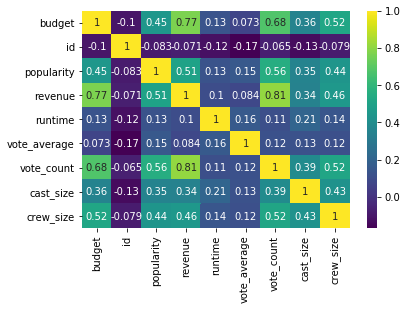

In [41]:
sns.heatmap(df.corr(),annot=True, cmap='viridis');

In [42]:
# 다작 감독
df['director'].value_counts().head(20)

John Ford             66
Michael Curtiz        65
Werner Herzog         54
Alfred Hitchcock      53
Georges Méliès        51
Woody Allen           49
Jean-Luc Godard       47
Sidney Lumet          46
Charlie Chaplin       44
Raoul Walsh           43
Henry Hathaway        42
William A. Wellman    42
George Cukor          41
Richard Thorpe        40
Martin Scorsese       40
Ingmar Bergman        39
Frank Capra           39
Fritz Lang            38
John Huston           38
Robert Altman         37
Name: director, dtype: int64

In [43]:
# 최고수입 감독
dir_sum = pd.DataFrame(df.groupby('director')['revenue'].sum().sort_values(ascending=False))
dir_sum.columns = ['Total']
dir_mean = pd.DataFrame(df.groupby('director')['revenue'].mean().sort_values(ascending=False))
dir_mean.columns = ['Average']
dir_count = pd.DataFrame(df.groupby('director')['revenue'].count().sort_values(ascending=False))
dir_count.columns = ['Number']

dir_pivot = pd.concat((dir_sum, dir_mean, dir_count), axis=1)
dir_pivot.sort_values('Total', ascending=False).head(20)

,Total,Average,Number
Steven Spielberg,9.256621e+09,2.805037e+08,33
Peter Jackson,6.528245e+09,5.021727e+08,13
Michael Bay,6.437467e+09,4.951898e+08,13
James Cameron,5.900610e+09,4.917175e+08,12
David Yates,5.334563e+09,5.334563e+08,10
Christopher Nolan,4.747409e+09,3.956174e+08,12
Robert Zemeckis,4.138234e+09,2.178018e+08,19
Tim Burton,4.032916e+09,1.920436e+08,21
Ridley Scott,3.917529e+09,1.632304e+08,24
Chris Columbus,3.866837e+09,2.577891e+08,15


In [44]:
# 최다 출연 배우
s = df.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True) # cast는 list로 저장 되어있어서 하나하나 나눠줌
s.name = 'cast'
cast_df = df.drop('cast', axis=1).join(s)
cast_df['cast'].value_counts().shape[0]
pop_cast = pd.DataFrame(cast_df['cast'].value_counts()).reset_index()
pop_cast.columns = ['cast', 'movies']
pop_cast.head(20)

,cast,movies
0,Bess Flowers,241
1,Christopher Lee,148
2,John Wayne,125
3,Samuel L. Jackson,123
4,Gérard Depardieu,110
5,Michael Caine,110
6,John Carradine,109
7,Donald Sutherland,109
8,Jackie Chan,108
9,Frank Welker,107


In [45]:
# 최고 수익 베우
cast_sum = pd.DataFrame(cast_df.groupby('cast')['revenue'].sum().sort_values(ascending=False))
cast_sum.columns = ['Total']
cast_mean = pd.DataFrame(cast_df.groupby('cast')['revenue'].mean().sort_values(ascending=False))
cast_mean.columns = ['Average']
cast_count = pd.DataFrame(cast_df.groupby('cast')['revenue'].count().sort_values(ascending=False))
cast_count.columns = ['Number']

cast_pivot = pd.concat((cast_sum, cast_mean, cast_count), axis=1)
cast_pivot.sort_values('Total', ascending=False).head(20)

,Total,Average,Number
Stan Lee,1.941496e+10,3.962236e+08,49
Samuel L. Jackson,1.710962e+10,1.391026e+08,123
Warwick Davis,1.325603e+10,3.898833e+08,34
Frank Welker,1.304415e+10,1.219080e+08,107
John Ratzenberger,1.259613e+10,2.738288e+08,46
Jess Harnell,1.223461e+10,3.495602e+08,35
Hugo Weaving,1.102758e+10,2.756895e+08,40
Ian McKellen,1.101559e+10,2.503544e+08,44
Johnny Depp,1.065376e+10,1.544023e+08,69
Alan Rickman,1.061263e+10,2.358361e+08,45


In [46]:
# release_date 변수를 통한 영화 시간 분석
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [47]:
# 망작 영화
df[df['vote_average'] < 4.5 ][df['vote_count'] > 100 ][['title', 'vote_average','year', 'vote_count','budget', 'revenue']].sort_values('vote_count', ascending=False).head(20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,title,vote_average,year,vote_count,budget,revenue
26623,Fantastic Four,4.4,2015,2322.0,120000000.0,167977596.0
1495,Batman & Robin,4.2,1997,1447.0,125000000.0,238207122.0
28268,The Boy Next Door,4.1,2015,1034.0,4000000.0,52425855.0
7951,Catwoman,4.2,2004,833.0,100000000.0,82102379.0
18137,Jack and Jill,4.0,2011,619.0,79000000.0,149673788.0
23153,The Legend of Hercules,4.4,2014,542.0,70000000.0,61279452.0
21278,Sharknado,3.8,2013,484.0,1000000.0,0.0
13591,Dragonball Evolution,2.9,2009,475.0,100000000.0,0.0
1490,Speed 2: Cruise Control,4.1,1997,439.0,160000000.0,164508066.0
24458,Left Behind,3.7,2014,396.0,16000000.0,19682924.0


In [48]:
gross_top = df[['title', 'budget', 'revenue', 'vote_average', 'vote_count', 'cast_size', 'crew_size','director']].sort_values('revenue', ascending=False).head(10)

In [49]:
gross_top

,title,budget,revenue,vote_average,vote_count,cast_size,crew_size,director
14580,Avatar,237000000.0,2.787965e+09,7.2,12114.0,83,153,James Cameron
26615,Star Wars: The Force Awakens,245000000.0,2.068224e+09,7.5,7993.0,84,113,J.J. Abrams
1643,Titanic,200000000.0,1.845034e+09,7.5,7770.0,136,65,James Cameron
17854,The Avengers,220000000.0,1.519558e+09,7.4,12000.0,115,147,Joss Whedon
25130,Jurassic World,150000000.0,1.513529e+09,6.5,8842.0,28,435,Colin Trevorrow
28891,Furious 7,190000000.0,1.506249e+09,7.3,4253.0,52,98,James Wan
26618,Avengers: Age of Ultron,280000000.0,1.405404e+09,7.3,6908.0,72,74,Joss Whedon
17473,Harry Potter and the Deathly Hallows: Part 2,125000000.0,1.342000e+09,7.9,6141.0,102,15,David Yates
22151,Frozen,150000000.0,1.274219e+09,7.3,5440.0,56,25,Chris Buck
42289,Beauty and the Beast,160000000.0,1.262886e+09,6.8,5530.0,156,115,Bill Condon


In [44]:
import surprise
from surprise import Reader, Dataset, SVD, evaluate
from surprise.model_selection import cross_validate

In [106]:
ratings = pd.read_csv('ratings_small.csv')
links = pd.read_csv('links_small.csv')

In [107]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [108]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [109]:
ratings = ratings.rename(columns={'movieId':'tmdbId'})

In [110]:
ratings['tmdbId'] = ratings['tmdbId'].astype('float64')

In [111]:
meta = movies_metadata[['id', 'original_title']]

In [112]:
meta = meta.rename(columns={'id':'tmdbId'})

In [113]:
meta = meta[meta.tmdbId != '1997-08-20']

In [114]:
meta = meta[meta.tmdbId != '2012-09-29']

In [115]:
meta = meta[meta.tmdbId != '2014-01-01']

In [116]:
meta['tmdbId'] = meta['tmdbId'].astype('float64')

In [117]:
re_meta = pd.merge(links, meta, on='tmdbId', how='inner')

In [118]:
re_meta.head()

,movieId,imdbId,tmdbId,original_title
0,1,114709,862.0,Toy Story
1,2,113497,8844.0,Jumanji
2,3,113228,15602.0,Grumpier Old Men
3,4,114885,31357.0,Waiting to Exhale
4,5,113041,11862.0,Father of the Bride Part II


In [119]:
data= pd.merge(ratings, re_meta, on='tmdbId', how='inner')

In [120]:
data.head()

,userId,tmdbId,rating,timestamp,movieId,imdbId,original_title
0,1,1371.0,2.5,1260759135,2410,84602,Rocky III
1,4,1371.0,4.0,949810302,2410,84602,Rocky III
2,7,1371.0,3.0,851869160,2410,84602,Rocky III
3,19,1371.0,4.0,855193404,2410,84602,Rocky III
4,21,1371.0,3.0,853852263,2410,84602,Rocky III


In [121]:
data = data.drop('timestamp', axis=1)

In [122]:
data = data.drop('movieId', axis=1)

In [123]:
data = data.drop('imdbId', axis=1)

In [124]:
data.shape

(32136, 4)

In [156]:
data.head()

,userId,tmdbId,rating,original_title
0,1,1371.0,2.5,Rocky III
1,4,1371.0,4.0,Rocky III
2,7,1371.0,3.0,Rocky III
3,19,1371.0,4.0,Rocky III
4,21,1371.0,3.0,Rocky III


In [126]:
data.describe()

,userId,tmdbId,rating
count,32136.000000,32136.000000,32136.000000
mean,345.773401,2135.471465,3.585558
std,195.093310,6165.116609,1.047206
min,1.000000,2.000000,0.500000
25%,177.000000,377.000000,3.000000
50%,358.000000,920.000000,4.000000
75%,518.000000,2019.000000,4.000000
max,671.000000,134368.000000,5.000000


In [135]:
reader = surprise.Reader(rating_scale=(0.0, 5.0))

In [157]:
train_data = surprise.Dataset.load_from_df(data[['userId','tmdbId','rating']], reader)

In [137]:
trainset = train_data.build_full_trainset()

In [153]:
option = {'name' : 'pearson'}
algo = surprise.KNNBasic(sim_options=option)
algo.fit(trainset)
surprise.evaluate(algo, train_data)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Computing the pearson similarity matrix...
Done computing similarity matrix.

C:\ProgramData\Anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)



RMSE: 0.9739
MAE:  0.7597
------------
Fold 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9860
MAE:  0.7632
------------
Fold 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9743
MAE:  0.7570
------------
Fold 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9876
MAE:  0.7705
------------
Fold 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9990
MAE:  0.7710
------------
------------
Mean RMSE: 0.9842
Mean MAE : 0.7643
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'rmse': [0.9738508034454655,
                             0.9860422578824751,
                             0.9743247483402757,
                             0.9876497662807726,
                             0.9990367115226497],
                            'mae': [0.75970734229684,
                             0.7631707019885823,
                             0.756988134711322,
                             0.7704769717890118,
                             0.7709679844550786]})

In [141]:
algo = surprise.SVD()
algo.fit(trainset)
surprise.evaluate(algo, train_data)

C:\ProgramData\Anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.8824
MAE:  0.6820
------------
Fold 2
RMSE: 0.8917
MAE:  0.6846
------------
Fold 3
RMSE: 0.8922
MAE:  0.6924
------------
Fold 4
RMSE: 0.8959
MAE:  0.6910
------------
Fold 5
RMSE: 0.9173
MAE:  0.7052
------------
------------
Mean RMSE: 0.8959
Mean MAE : 0.6910
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'rmse': [0.8823542983351206,
                             0.8916559215040584,
                             0.892192633354862,
                             0.8959454419729467,
                             0.9172753106670332],
                            'mae': [0.6819775950011217,
                             0.684568676578049,
                             0.6924186861284919,
                             0.6909882451748065,
                             0.7051744696360375]})

In [154]:
result = algo.get_neighbors(30, k=10)
for r1 in result :
    print(r1)

62
316
363
390
414
475
478
482
487
553
